# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data

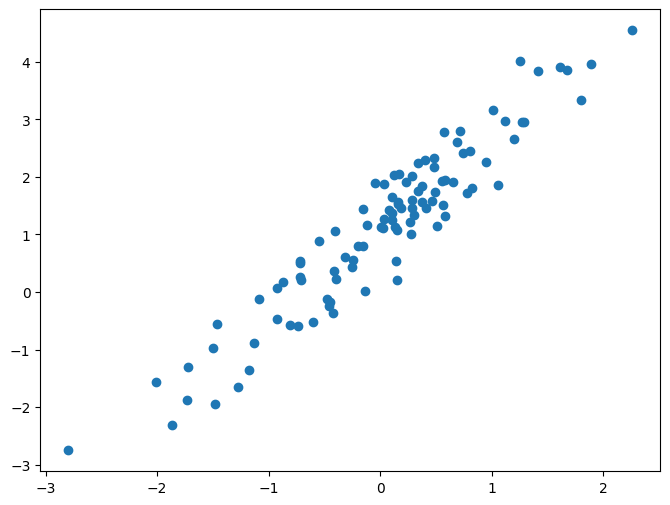

In [2]:
X = np.random.normal(size=100)
y = X * 1.5 + 1 + np.random.normal(size=100, scale=0.5)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.show()

# Model

In [4]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

# Train

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape((-1, 1)), y, test_size=0.2)

linReg = LinearRegression(lr=0.01)
linReg.fit(X_train, y_train)

y_pred = linReg.predict(X_test)
y_pred

array([ 1.36948951,  2.07031378,  1.48543739,  3.01980464, -0.85714675,
        2.26201159,  3.52879252,  2.9890078 ,  3.23723973,  2.3373184 ,
       -0.31804039,  0.47503196, -0.56835341,  1.51535984,  3.94947757,
        1.31105275,  1.01440184,  1.20822892,  2.61653818, -0.33103036])

# Evaluation

In [6]:
def mse(y_real, y_pred):
    return np.sum((y_pred - y_real)**2)

loss = mse(y_test, y_pred)

print(f"MSE: {loss}\nRMSE: {np.sqrt(loss)}")

MSE: 4.758207141148054
RMSE: 2.181331506476733


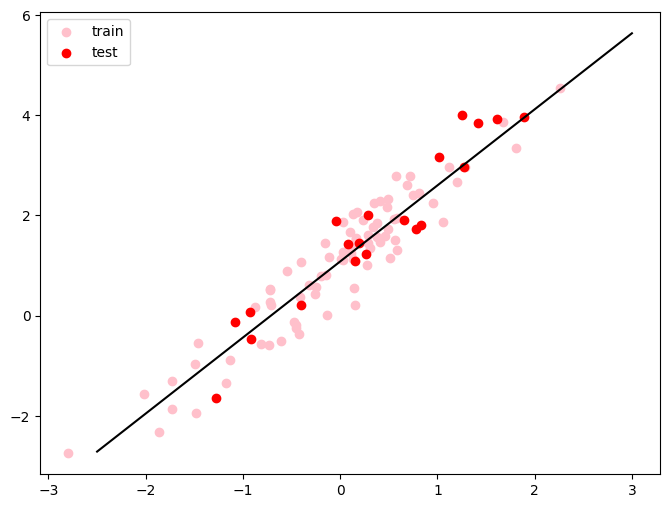

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color="pink", label="train")
plt.scatter(X_test, y_test, color="red", label="test")
plt.plot(np.linspace(-2.5, 3, 100), linReg.predict(np.linspace(-2.5, 3, 100).reshape((-1, 1))), color="black")
plt.legend()
plt.show()